In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load in the Data
I already pulled the data from my RDS instance and saved it into some csv files. 
Now we can read the csv files as DFs.

***Disclaimer: 
I know the dataset is not big enough to be representative, but this is just a mock scenario for practice and demonsration purposes only. 

In [4]:
tweets = pd.read_csv('tweets.csv')
tweets

,tweet_id,tweet_body,thirty_min_close_nyc
0,1336671833593036800,getting tight $nvda https://t.co/Aplb5CNh7O,2020-12-09 09:00
1,1336671810981650433,TSLA may just be opening the door for Google a...,2020-12-09 09:00
2,1336671665095405569,Fun portfolio (small percentage of capital) - ...,2020-12-09 09:00
3,1336671643222102017,Mixed bag for big caps in pre-market order-flo...,2020-12-09 09:00
4,1336671522145103874,CSE: $MEAT OTC: $SUVRF Could Rally Hard Today!...,2020-12-09 09:00
...,...,...,...
3447,1341128049773793280,"$VIX closed up 17%, about 50% at one point. $...",2020-12-21 16:30
3448,1341128049740427264,Curious if any of my screen reader using frien...,2020-12-21 16:30
3449,1341127969528549376,What a wild ride today! BullTrades members abs...,2020-12-21 16:30
3450,1341127384276332547,$AAPL \n\n#ES_F #NQ_F $NQ_F $SPX $SPY $NDX $Q...,2020-12-21 16:30


In [5]:
stock_data = pd.read_csv('stock_data.csv')
stock_data

,open,high,low,close,closetime,returns_percent,volatility_percent
0,534.144897,534.166016,532.520020,532.559998,2020-12-09 11:30,-0.296717,0.308155
1,530.820007,530.820007,529.929993,530.010010,2020-12-09 12:00,-0.152594,0.167668
2,528.400024,528.512817,527.239990,527.840027,2020-12-09 12:30,-0.105980,0.240883
3,525.010010,525.890015,523.710022,523.710022,2020-12-09 13:00,-0.247612,0.415229
4,522.900024,523.349976,521.500000,521.500000,2020-12-09 13:30,-0.267742,0.353791
...,...,...,...,...,...,...,...
108,532.000000,533.500000,532.000000,533.500000,2020-12-21 13:30,0.281955,0.281955
109,533.859985,533.989990,533.440125,533.789978,2020-12-21 14:00,-0.013113,0.102998
110,533.390015,533.829895,533.280029,533.359985,2020-12-21 14:30,-0.005630,0.103089
111,533.000000,533.354980,532.789978,532.968201,2020-12-21 15:00,-0.005966,0.106004


## Statements 
We have 112 candle closes, and 3451 tweets in our data sets. 
For every candle close, there will be multiple tweets, so lets group the tweets and get a count of tweets for each timestamp.

In [30]:
#bucket the tweets by their timewindow
tweets_per_candle = tweets.groupby('thirty_min_close_nyc').size()
tweets_per_candle

thirty_min_close_nyc
2020-12-09 09:00    21
2020-12-09 09:30    21
2020-12-09 10:00    39
2020-12-09 10:30    35
2020-12-09 11:00    41
                    ..
2020-12-21 14:30    14
2020-12-21 15:00    15
2020-12-21 15:30    13
2020-12-21 16:00    11
2020-12-21 16:30    31
Length: 144, dtype: int64

# Joining the dataframes together

In [31]:
#make series into a df
tweets_per_candle = pd.DataFrame(tweets_per_candle).reset_index()
#make column name match the stock data 
tweets_per_candle.columns = ['closetime','tweet count']

In [32]:
tweets_per_candle

,closetime,tweet count
0,2020-12-09 09:00,21
1,2020-12-09 09:30,21
2,2020-12-09 10:00,39
3,2020-12-09 10:30,35
4,2020-12-09 11:00,41
...,...,...
139,2020-12-21 14:30,14
140,2020-12-21 15:00,15
141,2020-12-21 15:30,13
142,2020-12-21 16:00,11


In [34]:
#join the new df to the prices 
stock_data = stock_data.merge(tweets_per_candle, how='inner', on='closetime')
stock_data

,open,high,low,close,closetime,returns_percent,volatility_percent,tweet count
0,534.144897,534.166016,532.520020,532.559998,2020-12-09 11:30,-0.296717,0.308155,29
1,530.820007,530.820007,529.929993,530.010010,2020-12-09 12:00,-0.152594,0.167668,21
2,528.400024,528.512817,527.239990,527.840027,2020-12-09 12:30,-0.105980,0.240883,24
3,525.010010,525.890015,523.710022,523.710022,2020-12-09 13:00,-0.247612,0.415229,29
4,522.900024,523.349976,521.500000,521.500000,2020-12-09 13:30,-0.267742,0.353791,27
...,...,...,...,...,...,...,...,...
108,532.000000,533.500000,532.000000,533.500000,2020-12-21 13:30,0.281955,0.281955,20
109,533.859985,533.989990,533.440125,533.789978,2020-12-21 14:00,-0.013113,0.102998,13
110,533.390015,533.829895,533.280029,533.359985,2020-12-21 14:30,-0.005630,0.103089,14
111,533.000000,533.354980,532.789978,532.968201,2020-12-21 15:00,-0.005966,0.106004,15


# Let's generate a general overview and see if there are any patterns
There's going to be a lot of redundant data here and I don't want to waste the space. Things like the OHLC will all be intercorrelated, so I'll scrap them for now.

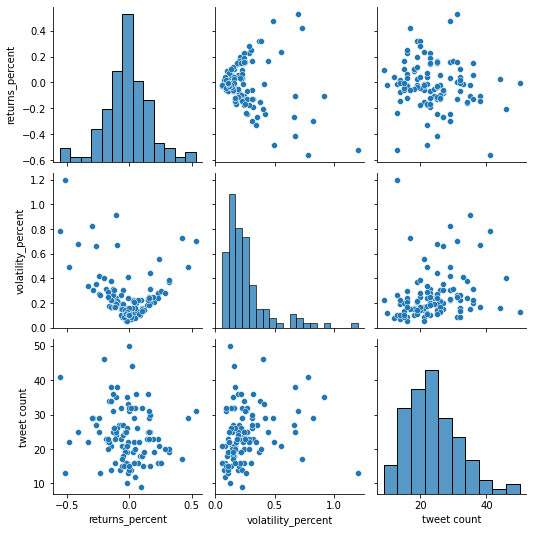

In [41]:
lighter_data = stock_data[['returns_percent', 'volatility_percent', 'tweet count', 'closetime']]
sns.pairplot(data=lighter_data)

We can see a lot here. 
#### Returns
- Returns are somewhat normally distributed, which we don't usually expect from financial data. 
- There is a high degree of kurtosis, leptokurtosis. Indicating that returns are highly consistent, but when outlier events do inevitably occur, they can have a large impact - fat tails.

#### Volatility
- There's a very strong positive skew to the data here, and a long positive tail. 
- This is a widely recognised phenomenon of financial data, most events can be easily contained within a clearly defined zone - a direct example from this data is that we can expect most of the time, we can expect the volatility to not exceed 0.25% in any 30 minute time period. The caveat is that when outlier events **do** occur, there is risk that they will be outsized.

#### Tweet count
- Tweet count is slightly positively skewed, with around 15-30 tweets making up the majority of the number of tweets per 30 minute period. 
- This also raises questions about *when* we might see tweet frequency during the day. Something to explore.

# Let's see how tweet count affects price

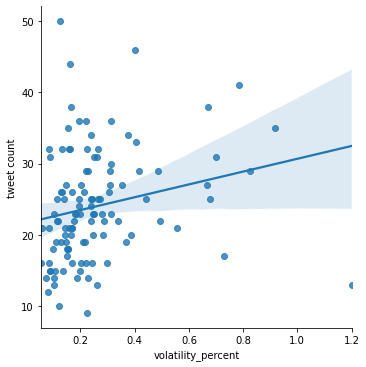

In [35]:
#first let's look at the tweet count vs the volatility
sns.lmplot(x='volatility_percent',y='tweet count',data=stock_data)

There doesn't appear to be much of a strong relationship between these two variables. This is probably too crude of an analysis, it may require some NLP on the content of the tweets, to then guage the overall sentiment in a time window.

The confidence interval of the regression is also extremely wide, indicating that the regression line is highly imprecise.

We can look at the correlation to be sure:

In [44]:
stock_data[['volatility_percent', 'tweet count']].corr()

,volatility_percent,tweet count
volatility_percent,1.000000,0.222407
tweet count,0.222407,1.000000


An interesting idea from above was to investigate the effect of time of day on volatility and tweet count: 

In [47]:
tod_df = stock_data[['volatility_percent', 'tweet count', 'closetime']]
tod_df['closetime'] = tod_df['closetime'].apply(lambda x: x.split()[1])
tod_df

<ipython-input-47-c104d76113f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tod_df['closetime'] = tod_df['closetime'].apply(lambda x: x.split()[1])


,volatility_percent,tweet count,closetime
0,0.308155,29,11:30
1,0.167668,21,12:00
2,0.240883,24,12:30
3,0.415229,29,13:00
4,0.353791,27,13:30
...,...,...,...
108,0.281955,20,13:30
109,0.102998,13,14:00
110,0.103089,14,14:30
111,0.106004,15,15:00


<AxesSubplot:label='148bdb41-f1e9-419b-91db-16e439db2f52', xlabel='closetime', ylabel='tweet count'>

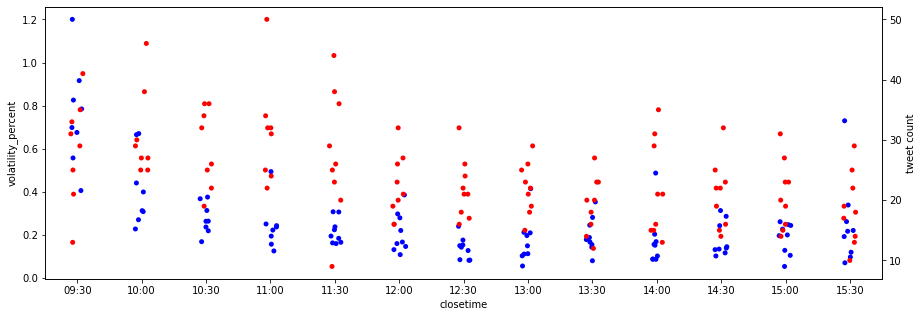

In [81]:
order = ['09:30','10:00','10:30','11:00','11:30','12:00','12:30','13:00','13:30','14:00','14:30','15:00','15:30']
fig, ax = plt.subplots(figsize=(15,5))
sns.stripplot(ax=ax, data=tod_df, x='closetime', y='volatility_percent', color='blue', order=order)
sns.stripplot(ax=plt.twinx(), data=tod_df, x='closetime', y='tweet count', order=order, color='red')

### tweetcount = red | volatility = blue

It's quite subtle, but the data looks like volatility is highest in the morning, then begins to lull toward midday, then picks up a little more later. 
This actually makes sense, as we can expect liquidity to be at it's highest during mid day, and then thin out as RTH end. 

Looking at the tweet activity, it is certinly highest in the morning too, but it remains relatively high throughout the day.